

# Project:TMDb Movie Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and cleaning</a></li>
<li><a href="#1_question">First Question</a></li>
<li><a href="#2_question">Second Question</a></li>
<li><a href="#3_question">Third Question</a></li>    
<li><a href="#4_question">Fourth Question</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


> We have a data set that has about 10866 rows of movies and 21 columns collected from The Movie Database (TMDb). We need to clean and manipulate this data to answer our questions. 
 

### Question(s) for Analysis
>1. Which genres are most popular from year to year?
2.  What properties are associated with movies with high revenues?
3. Illustrate if there is a relation between revenue and different factors.
4. What kinds of properties are associated with having high ratings?


In [1]:
#Importing statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Information


In [2]:
# Loading and inspecting data
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()
#   types and look for instances of missing or possibly errant data.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.duplicated().sum()


1

# Dropping and cleaning data that we will not use in our analysis

In [8]:
df.drop(['id','imdb_id','budget','revenue','cast','homepage','tagline','keywords','overview','runtime','production_companies','release_date'], axis=1,inplace=True)

In [9]:
df.duplicated().sum()

1

In [10]:
df[df.duplicated()]

,popularity,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,TEKKEN,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


In [11]:
df.shape

(10866, 9)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(10865, 9)

In [14]:
df.isnull().sum()

popularity         0
original_title     0
director          44
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [15]:
df.dropna(inplace = True)

In [16]:
df.shape

(10800, 9)

In [17]:
df.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,0.649455,218.600741,5.970880,2001.289537,1.765437e+07,5.167714e+07
std,1.002441,577.165055,0.933006,12.819545,3.438403e+07,1.450182e+08
min,0.000188,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209157,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.385471,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.717508,147.000000,6.600000,2011.000000,2.103337e+07,3.408743e+07
max,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [18]:
zero_data = df[(df.budget_adj == 0)|(df.revenue_adj == 0)]
zero_data.head()

,popularity,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,Mr. Holmes,Bill Condon,Mystery|Drama,425,6.4,2015,0.000000e+00,2.700677e+07
36,3.358321,Solace,Afonso Poyart,Crime|Drama|Mystery,474,6.2,2015,0.000000e+00,2.056620e+07
48,2.932340,Wild Card,Simon West,Thriller|Crime|Drama,481,5.3,2015,2.759999e+07,0.000000e+00
67,2.331636,Survivor,James McTeigue,Crime|Thriller|Action,280,5.4,2015,1.839999e+07,0.000000e+00
72,2.272044,Beyond the Reach,Jean-Baptiste LÃ©onetti,Thriller,81,5.5,2015,0.000000e+00,4.222338e+04


In [19]:
df.drop(zero_data.index,inplace=True)

In [20]:
df.shape

(3853, 9)

# Our Data Statistics After Cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 9 columns):
popularity        3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
genres            3853 non-null object
vote_count        3853 non-null int64
vote_average      3853 non-null float64
release_year      3853 non-null int64
budget_adj        3853 non-null float64
revenue_adj       3853 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 301.0+ KB


In [22]:
df.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3853.000000,3853.000000,3853.000000,3853.000000,3.853000e+03,3.853000e+03
mean,1.191825,527.854399,6.168258,2001.259278,4.425038e+07,1.370974e+08
std,1.475258,880.031643,0.795001,11.283517,4.481043e+07,2.161299e+08
min,0.001117,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462609,71.000000,5.700000,1995.000000,1.309053e+07,1.840420e+07
50%,0.797723,204.000000,6.200000,2004.000000,3.001664e+07,6.174274e+07
75%,1.368403,580.000000,6.700000,2010.000000,6.061307e+07,1.632752e+08
max,32.985763,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


# Visualising Data Numbers

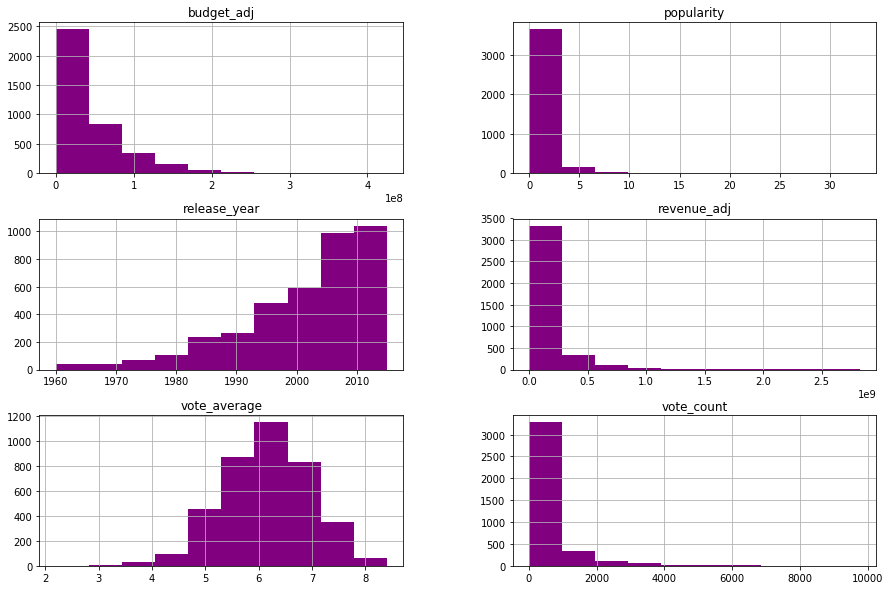

In [23]:
df.hist(figsize=(15,10), color = 'purple');

# Sorting release years to be Visualised in a graph

In [24]:
bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960 to 1970','1970 to 1980','1980 to 1990','1990 to 2000','2000 to 2010','2010 to 2015']
df.release_year = pd.cut(df.release_year, bins_edges, labels = bins_names)
df.release_year.value_counts()

2000 to 2010    1531
2010 to 2015     862
1990 to 2000     808
1980 to 1990     425
1970 to 1980     145
1960 to 1970      77
Name: release_year, dtype: int64

# Splitting the genres of movies to be classified 

In [25]:
detailed_genres=(df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))

In [26]:
df['genres'] = detailed_genres['genres_1']

In [27]:
display(df['genres'].value_counts().nlargest(5))

Drama        889
Comedy       787
Action       689
Adventure    314
Horror       275
Name: genres, dtype: int64

In [28]:
sum(df['genres'].value_counts())

3853

In [29]:
df.genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Thriller',
       'Fantasy', 'History', 'Mystery', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

<a id='1_question'></a>
# First Question
### Which genres are most popular from year to year?

In [30]:
Sum_popular_geners = df.groupby(['release_year','genres'])['popularity'].sum().unstack()
Sum_popular_geners

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960 to 1970,8.434800,20.467302,1.936962,9.447042,4.190091,NaN,11.446492,2.550704,NaN,1.738669,2.113390,1.113536,0.402730,NaN,3.309196,NaN,NaN,0.378658,1.828119
1970 to 1980,15.554736,32.709275,2.448143,14.057514,10.078261,NaN,36.412820,2.430667,1.849689,NaN,21.641974,3.304837,0.810054,1.392663,7.890119,NaN,0.806108,NaN,0.128234
1980 to 1990,66.681074,67.495089,7.611945,52.977609,9.469058,0.594572,54.264426,1.482823,23.672996,NaN,35.039930,1.858182,0.517691,4.980992,23.020168,NaN,7.994021,2.797739,NaN
1990 to 2000,154.680270,69.498848,25.973446,134.344722,44.631937,0.860207,153.785185,13.590166,30.073680,3.065274,37.877858,3.395811,10.996071,19.698653,22.929817,0.273628,31.370128,0.194078,0.841580
2000 to 2010,321.607562,245.546482,80.874721,305.232757,43.879080,6.643983,305.650042,23.590057,76.817266,4.954941,79.837101,10.860167,12.107418,27.441253,37.219149,NaN,60.771640,10.021591,5.936358
2010 to 2015,423.795249,162.617727,57.565261,202.857580,71.558562,1.163988,261.221532,20.727365,41.568956,14.759105,58.831308,5.976310,15.982115,36.904589,94.912374,NaN,86.486939,19.777865,10.368396


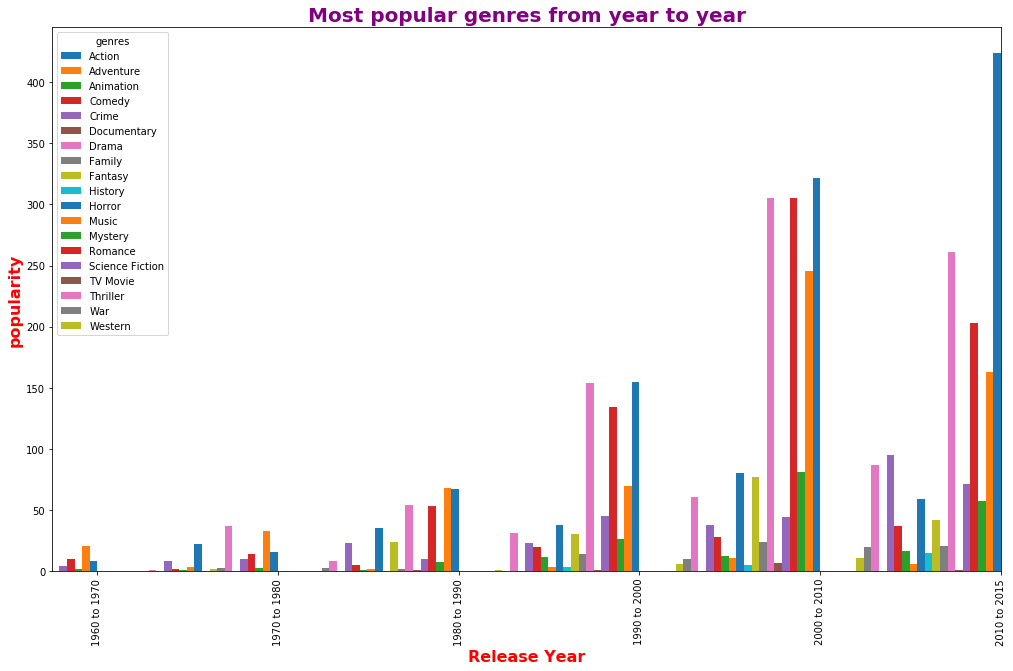

In [31]:
fig, ax = plt.subplots(figsize=(17,10))
Sum_popular_geners.plot(kind='bar',ax=ax,width=-.8,align='edge');
ax.set_xlabel('Release Year',weight = "bold",fontsize = 16, color = 'red');
ax.set_ylabel('popularity',weight = "bold",fontsize = 16, color = 'red');
plt.title('Most popular genres from year to year', fontsize = 20, weight = "bold", color = 'purple');

## We can deduce from the graph and the data frame table the next :
 - from 1960 to 1970 Adventure movies were the most popular movies.
 - from 1970 to 1980 Drama movies were the most popular movies.
 - from 1980 to 1990 Adventure movies were the most popular movies.
 - from 1990 to 2000 Action movies were the most popular movies.
 - from 2000 to 2010 Action movies were the most popular movies.
 - from 2010 to 2015 Action movies were the most popular movies.


<a id='2_question'></a>
# Second Question
### What kinds of properties are associated with movies that have high revenues?

In [32]:
genres_revenue_chart = df.groupby(['genres'])['revenue_adj'].sum()
genres_revenue_chart

genres
Action             1.120676e+11
Adventure          9.550580e+10
Animation          3.048636e+10
Comedy             7.917396e+10
Crime              1.682894e+10
Documentary        7.562093e+08
Drama              8.094705e+10
Family             1.091364e+10
Fantasy            2.137622e+10
History            2.857131e+09
Horror             2.166199e+10
Music              3.728583e+09
Mystery            3.149635e+09
Romance            8.203111e+09
Science Fiction    2.128272e+10
TV Movie           5.838910e+07
Thriller           1.457446e+10
War                2.811547e+09
Western            1.852850e+09
Name: revenue_adj, dtype: float64

In [33]:
genres_revenue_list =[]
for i in range(len(genres_revenue_chart)):
    genres_revenue_list.append(round(genres_revenue_chart[i]/10**11,3))


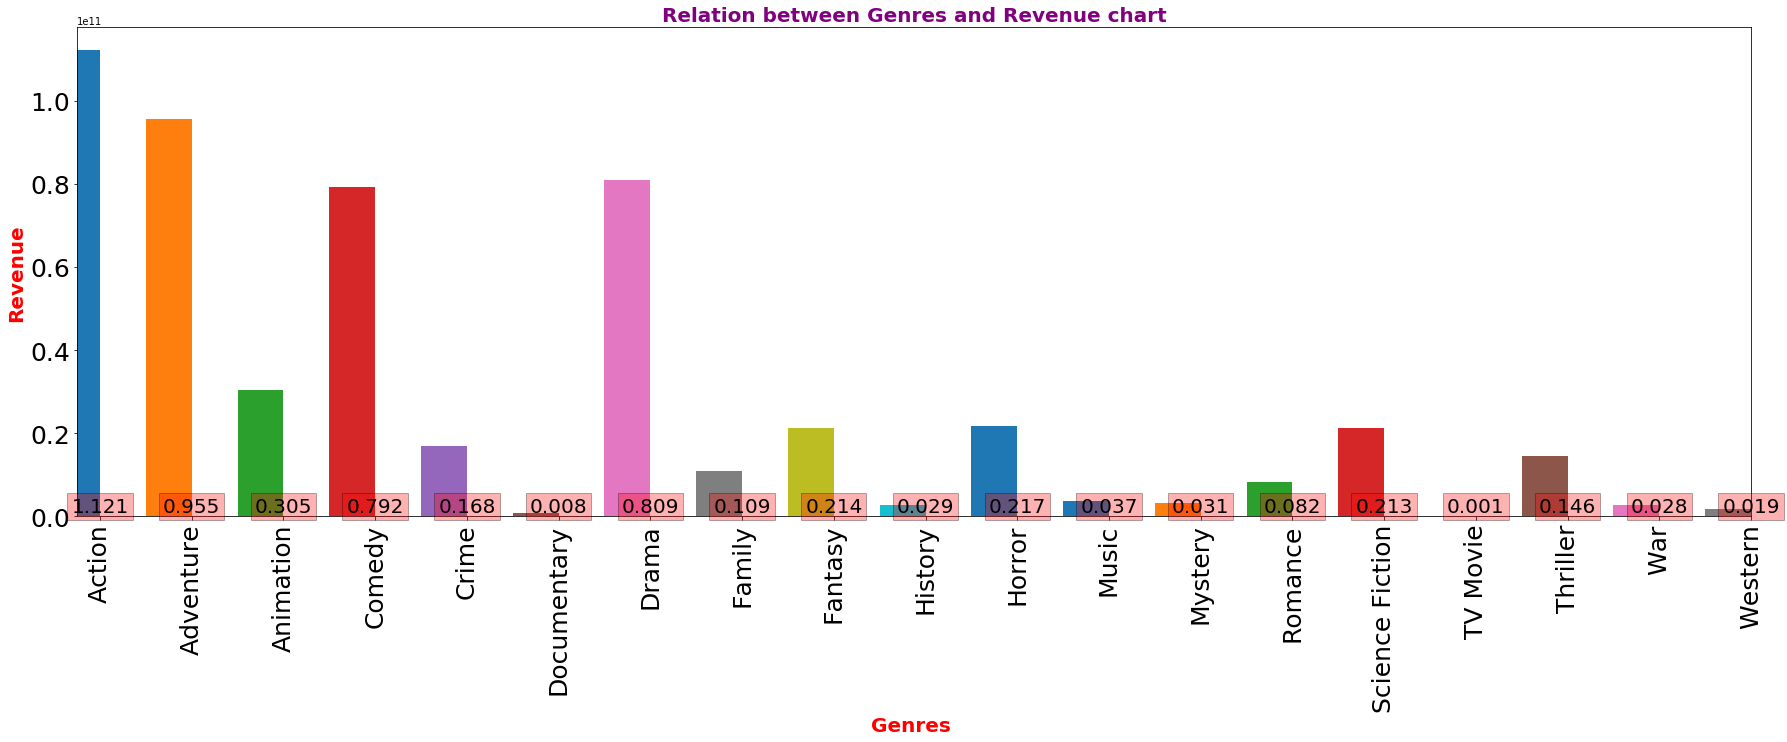

In [34]:
fig, ax = plt.subplots(figsize=(30,9))
genres_revenue_chart.plot(kind='bar',ax=ax,width=-.5,align='edge',fontsize = 25);
ax.set_xlabel('Genres ',weight = "bold",fontsize = 20, color = 'red');
ax.set_ylabel('Revenue',weight = "bold",fontsize = 20, color = 'red');
plt.title('Relation between Genres and Revenue chart', fontsize = 20, weight = "bold", color = 'purple');
def addlabels(x,y):
     for i in range(len(x)):
        plt.text(i,y[i],y[i],ha='center',va='bottom',fontsize = 20,Bbox = dict(facecolor = 'red', alpha =.3))
        
addlabels(df.genres.unique(),genres_revenue_list)

- As we can see in this graph, Action movies are the most revenued movies and in second place Adventure movies comes next 

<a id='3_question'></a>
# Third question 
### Illustrate if there is a relation between revenue and different factors  

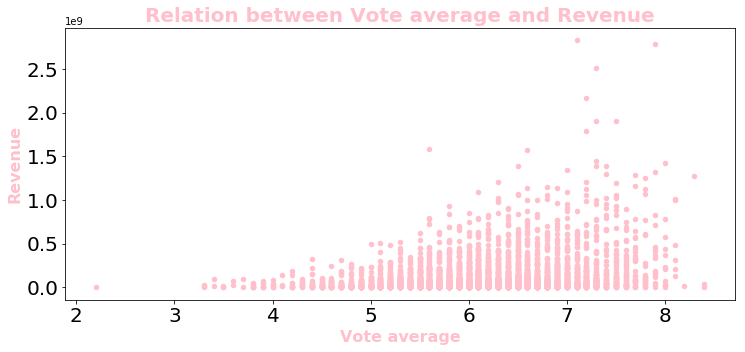

In [35]:
df.plot(x='vote_average', y= 'revenue_adj', kind = 'scatter',figsize = (12,5), color = 'pink',fontsize = 20);
plt.title("Relation between Vote average and Revenue",fontsize = 20, color = 'pink',weight = 'bold');
plt.xlabel('Vote average',weight = 'bold',fontsize = 16, color = 'pink');
plt.ylabel('Revenue',weight = 'bold',fontsize = 16, color = 'pink');

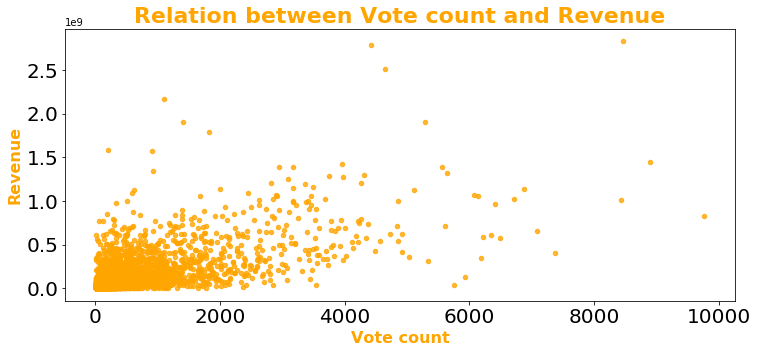

In [36]:
df.plot(x='vote_count', y= 'revenue_adj', kind = 'scatter',figsize = (12,5),alpha = .8, color = 'orange',fontsize = 20);
plt.title("Relation between Vote count and Revenue",fontsize = 22, color = 'orange',weight = 'bold');
plt.xlabel('Vote count',weight = 'bold',fontsize = 16, color = 'orange');
plt.ylabel('Revenue',weight = 'bold',fontsize = 16, color = 'orange');

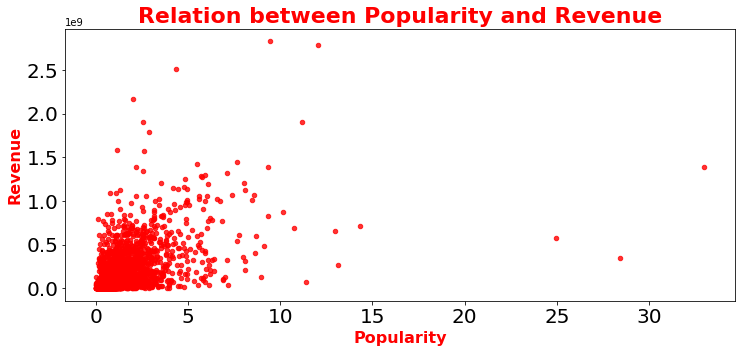

In [37]:
df.plot(x='popularity', y= 'revenue_adj', kind = 'scatter',figsize = (12,5),alpha = .8, color = 'red',fontsize = 20);
plt.title("Relation between Popularity and Revenue",fontsize = 22, color = 'red',weight = 'bold');
plt.xlabel('Popularity',weight = 'bold',fontsize = 16, color = 'red');
plt.ylabel('Revenue',weight = 'bold',fontsize = 16, color = 'red');

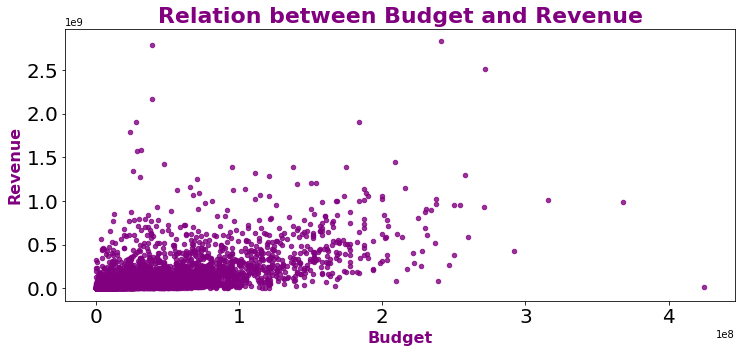

In [38]:
df.plot(x='budget_adj', y= 'revenue_adj', kind = 'scatter',figsize = (12,5),alpha = .8, color = 'purple',fontsize = 20);
plt.title("Relation between Budget and Revenue",fontsize = 22, color = 'purple',weight = 'bold');
plt.xlabel('Budget',weight = 'bold',fontsize = 16, color = 'purple');
plt.ylabel('Revenue',weight = 'bold',fontsize = 16, color = 'purple');

- We can see there is a positive correlation between revenue and each one of the Vote averages, Vote count, Popularity, and Budget

<a id='4_question'></a>
# Fourth question
### What kinds of properties are associated with having high ratings?

In [39]:
x =df.groupby(['genres'])['vote_average'].mean()
x

genres
Action             5.996517
Adventure          6.250955
Animation          6.361165
Comedy             6.017154
Crime              6.460234
Documentary        6.656250
Drama              6.438695
Family             6.100000
Fantasy            6.080000
History            6.494118
Horror             5.749818
Music              6.193103
Mystery            6.136111
Romance            6.451515
Science Fiction    6.244898
TV Movie           5.600000
Thriller           5.993125
War                6.480000
Western            6.418750
Name: vote_average, dtype: float64

In [40]:
genres_vote_average_list =[]
for i in range(len(x)):
    genres_vote_average_list.append(round(x[i],2))

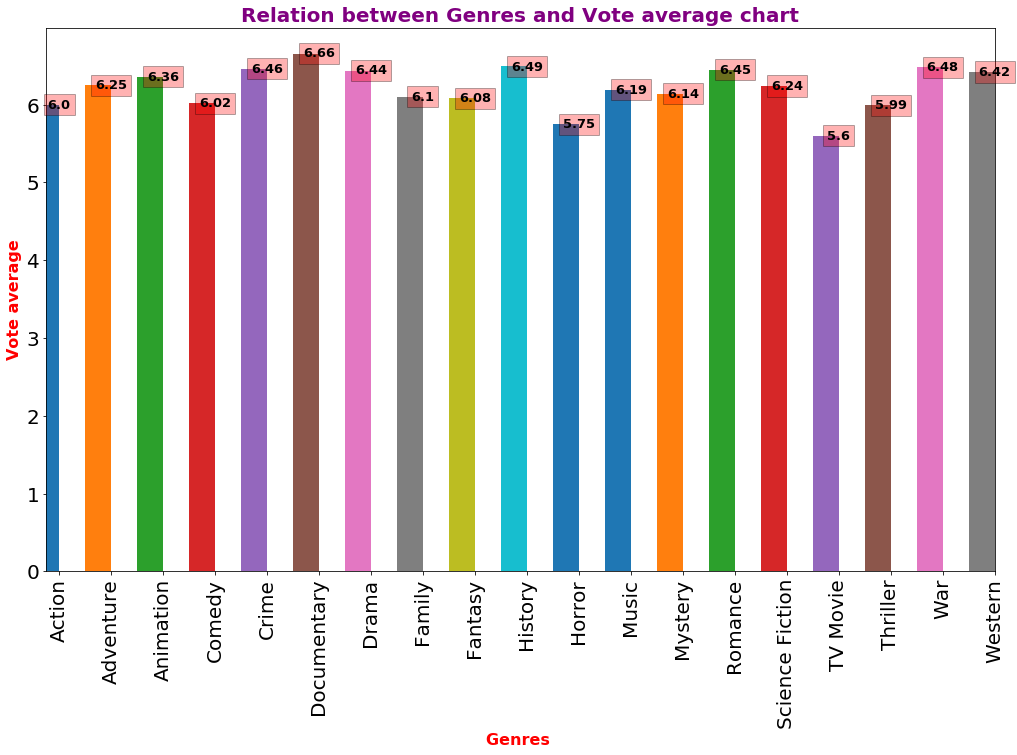

In [41]:
fig, ax = plt.subplots(figsize=(17,10))
x.plot(kind='bar',ax=ax,width=-.5,align='edge', fontsize = 20);
ax.set_xlabel('Genres ',weight = "bold",fontsize = 16, color = 'red');
ax.set_ylabel('Vote average',weight = "bold",fontsize = 16, color = 'red');
plt.title('Relation between Genres and Vote average chart', fontsize = 20, weight = "bold", color = 'purple');
def addlabels(x,y):
     for i in range(len(x)):
        plt.text(i,y[i],y[i],ha='center',va='center',fontsize = 13,Bbox = dict(facecolor = 'red', alpha =.3),weight = "bold")
        
addlabels(x,genres_vote_average_list)

- From the graph we can see there is a small variation in the Vote average and the Genres of the movies. Documentary movies come in the first place, History movies come next, while TV Movies and Horror movies come in last place.

In [42]:
# getting the best 10 directors and their average vote average.
x =df.groupby(['director'])['vote_average'].mean().nlargest(10)
x

director
Damien Chazelle            8.2
Lenny Abrahamson           8.0
Morten Tyldum              8.0
Pete Docter                8.0
Tony Kaye                  8.0
Xavier Dolan               8.0
Louis C.K.                 7.9
Ashutosh Gowariker         7.8
Don Hall|Chris Williams    7.8
Jaco Van Dormael           7.8
Name: vote_average, dtype: float64

In [43]:
director_vote_average_list =[]
for i in range(len(x)):
    director_vote_average_list.append(round(x[i],2))


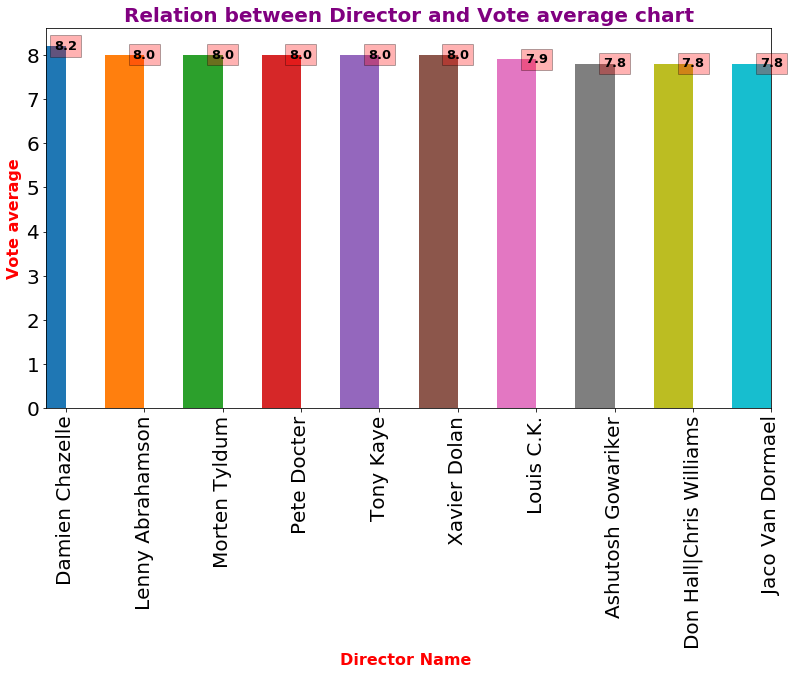

In [44]:
fig, ax = plt.subplots(figsize=(13,7))
x.plot(kind='bar',ax=ax,width=-.5,align='edge', fontsize = 20);
ax.set_xlabel('Director Name ',weight = "bold",fontsize = 16, color = 'red');
ax.set_ylabel('Vote average',weight = "bold",fontsize = 16, color = 'red');
plt.title('Relation between Director and Vote average chart', fontsize = 20, weight = "bold", color = 'purple');
        
addlabels(x,director_vote_average_list)

- We graph the best ten directors as shown in the figure. Damien Chazelle was in first place and after him the are five directors with the same vote average and their names are Lenny Abrahamson, Morten Tyldum, Pete Docter, Tony Kaye, and  Xavier Dolan

<a id='conclusions'></a>
## Conclusions

>• We had a dataset that contains 10866 rows and 21 columns but after filtering and manipulating we reached 3853 rows and 9 columns. from dropping that huge number of columns we include that the data is missing a huge number of values and that has a huge impact on our precision and accuracy.
>• Our dataset is out of date and there must be changes and several updates to be seen if we consider those updates.
>• From our analyses we obtained that Action movies are the most popular in the last few years and also it achieve the highest revenue 
> •We see also that the more budget movies the more you will achieve revenue 

## Limitations

- This analysis was taken from one site [IMDB](https://www.imdb.com)  and there were missing data. it's suggested to gather the data in more efficient way and use web scraping in an advanced way.
- we dropped lots of rows in the analysis due to missing value and that affected  our analysis of course 

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0